# Quick Test: confocal cavity vs equivalent half-cavity

In [1]:
from pykat import finesse
import matplotlib.pyplot as plt
%matplotlib inline

                                              ..-
    PyKat 1.0.18          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



### Curved-flat cavity:

--------------------------------------------------------------
Running kat - Started at 2017-05-26 13:04:47.518245

Finished in 0.135101 seconds

------------------------------------------------------------------------
                     FINESSE pre-2.1.0    (build pre-2.1.0-225-g61a5d92)
       o_.-=.        Frequency domain INterferomEter Simulation SoftwarE
      (\'".\|        23.04.2016         http://www.gwoptics.org/finesse/
      .>' (_--.      
   _=/d   ,^\        Input file C:\Users\Xu\AppData\Local\Temp\tmpmzhuubdg.kat,
  ~~ \)-'   '        Output file C:\Users\Xu\AppData\Local\Temp\tmpmzhuubdg.out,
     / |             Gnuplot file C:\Users\Xu\AppData\Local\Temp\tmpmzhuubdg.gnu 
    '  '                                        Fri May 26 13:04:47 2017
------------------------------------------------------------------------
 --- cavity tracing
 cavity cavity1:
  cavity is stable! Eigenvalues:
  q=0.5j, w0=411.510460923871um z=0m m=0
  finesse : 29.79, round-trip power loss

100% | ETA:  0:00:00 | Calculating                                             

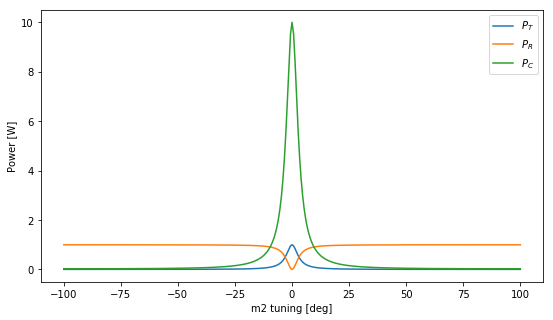

In [23]:
kat = finesse.kat()
kat.parseCommands("""

l i1 1 0 n1

s s0 1 n1 n3

m m1 0.9 0.1 0 n3 n4
s s_cav 0.5 n4 n5
m m2 0.9 0.1 0 n5 n6

attr m2 Rc 1

cav cavity1 m1 n4 m2 n5
maxtem 0

xaxis m2 phi lin -100 100 300

pd PR n3
pd PC n4
pd PT n6

trace 2
""")
out = kat.run()
print(out.stdout)

plt.figure(figsize = (9,5))

plt.plot(out.x, out["PT"],label="$P_T$")
plt.plot(out.x, out["PR"],label="$P_R$")
plt.plot(out.x, out["PC"],label="$P_C$")

plt.legend(loc=0)
plt.xlabel("m2 tuning [deg]")
plt.ylabel("Power [W]")

### Confocal cavity equivalent

--------------------------------------------------------------
Running kat - Started at 2017-05-26 13:08:52.512190

Finished in 0.125086 seconds

------------------------------------------------------------------------
                     FINESSE pre-2.1.0    (build pre-2.1.0-225-g61a5d92)
       o_.-=.        Frequency domain INterferomEter Simulation SoftwarE
      (\'".\|        23.04.2016         http://www.gwoptics.org/finesse/
      .>' (_--.      
   _=/d   ,^\        Input file C:\Users\Xu\AppData\Local\Temp\tmpww1cgzlu.kat,
  ~~ \)-'   '        Output file C:\Users\Xu\AppData\Local\Temp\tmpww1cgzlu.out,
     / |             Gnuplot file C:\Users\Xu\AppData\Local\Temp\tmpww1cgzlu.gnu 
    '  '                                        Fri May 26 13:08:52 2017
------------------------------------------------------------------------
 --- cavity tracing
 cavity cavity1:
  cavity is stable! Eigenvalues:
  q=-0.995+0.0705337j, w0=154.558946516459um z=-995mm m=0.9602
  finesse : 29.79,

100% | ETA:  0:00:00 | Calculating                                             

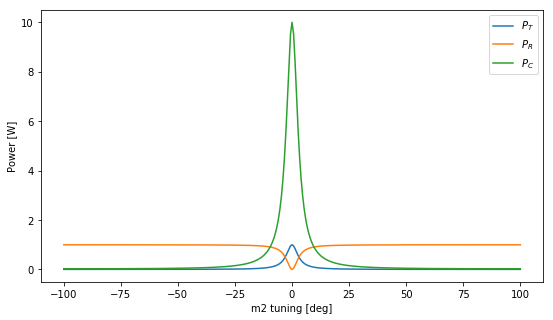

In [30]:
kat2 = kat.deepcopy()

kat2.s_cav.L = 1.99 #double the length
kat2.parseCommands("attr m1 Rc -1") #add the same curvature to the input mirror

out = kat2.run()
print(out.stdout)

plt.figure(figsize = (9,5))

plt.plot(out.x, out["PT"],label="$P_T$")
plt.plot(out.x, out["PR"],label="$P_R$")
plt.plot(out.x, out["PC"],label="$P_C$")

plt.legend(loc=0)
plt.xlabel("m2 tuning [deg]")
plt.ylabel("Power [W]")